# Hands-on Session for Image Mining 2

Credit to: [Youngeui Kim](https://cis.appstate.edu/directory/youngeui-kim-phd), [Yuxiao (Rain) Luo](https://yuxiaoluo.github.io)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YuxiaoLuo/AI_Intro/blob/main/week11_ImageMining_2.ipynb)

This session introduces how to detect objects in an image using Python library.

##  Object Detection using `tensorflow`

- import library

- load pre-trained models (algorithms) for object classification

- load deep learning algorithm/architecture for image classification.

The configuration file and pre-trained model can be downloaded from our GitHub repo: https://github.com/YuxiaoLuo/AI_Intro/tree/main/data/image_mining.

First, install the packages.

In [ ]:
import cv2
import matplotlib.pyplot as pl

Since the files are located in the folder path `data/image_mining/`, we should specify that when assigning objects.

In [2]:
config_file = 'data/image_mining/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'data/image_mining/frozen_inference_graph.pb'

# initiate deep learning detection model
model = cv2.dnn_DetectionModel(frozen_model, config_file)

See the list of objects available for detection below. For example, we can detect `person`, `car`, `cat`, etc..

In [3]:
classLabels = []
file_name = 'data/image_mining/cocoLabels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


Before we detect objects in an image, let's set the parameters of image for the detection model, including resizing the picture and adjusting the color input.

In [4]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002A60B2094F0>

- Now, it's time to load your image and print it -- you need to edit image name & format.
- I'm using the `week11_person.jpg` image in the `data` folder.

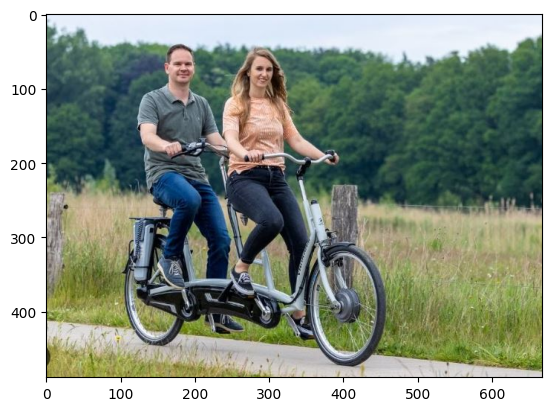

In [5]:
# edit the format (.jpg) appropriately
img = cv2.imread('data/week11_person.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Set up the Confidence (i.e., probability) for the detection task
- set the `confThreshold` for object detection
- if the threshold is too high, fewer objects (with high confidence) will be returned.

In [7]:
# we set the confidence param to 0.5
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)
indices = ClassIndex.flatten()

Run the pre-trained model with your image

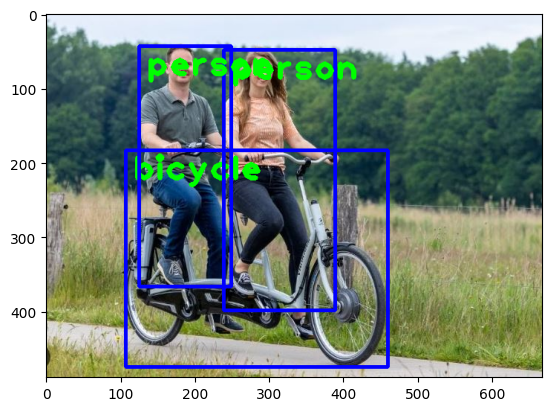

In [8]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 3)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color = (0, 255, 0), thickness = 5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Print out a list of detected objects.

In [9]:
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    print(classLabels[ClassInd - 1])

bicycle
person
person
